<a href="https://colab.research.google.com/github/Mirucla/Applied-Data-Management/blob/main/In_class_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import BaggingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier

In [35]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [36]:
file = "/content/gdrive/MyDrive/bank-additional-full.csv"
df = pd.read_csv(file, delimiter=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# 1.) Based on the visualization, transform the data based on your expert opinion

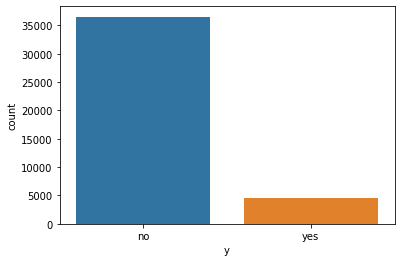

In [37]:
sns.countplot(x="y", data=df)
plt.show()

As per the plot, we observe that the data is unbalanced. 

In [38]:
counts = df["y"].value_counts()
counts

no     36548
yes     4640
Name: y, dtype: int64

There are nearly 73 times more 'yes' than 'no in the dataset. 

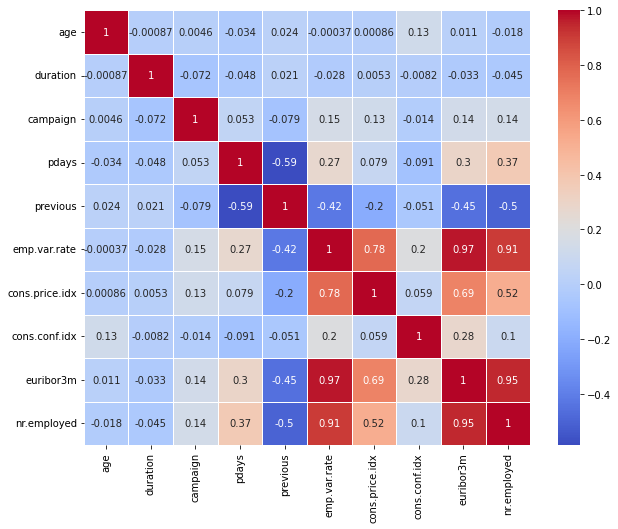

In [39]:
# Compute correlation matrix
corr = df.corr()

# Plot heatmap with larger size and clearer annotations
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=.5, annot_kws={"size": 10})
plt.show()

Based on the plot, We can drop the highly corrleated variables as these will add no additional benefit to the modelling. 

In [40]:
# Drop highly correlated features
df = df.drop(["euribor3m", "nr.employed"], axis=1)

In [41]:
# Convert categorical variables to dummy variables
df = pd.get_dummies(df, columns=["job", "marital", "education", "default", "housing", "loan", "contact", 
                                 "month", "day_of_week", "poutcome"])

df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,y,job_admin.,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,no,0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,no,0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,no,0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,no,1,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,no,0,...,0,0,0,1,0,0,0,0,1,0


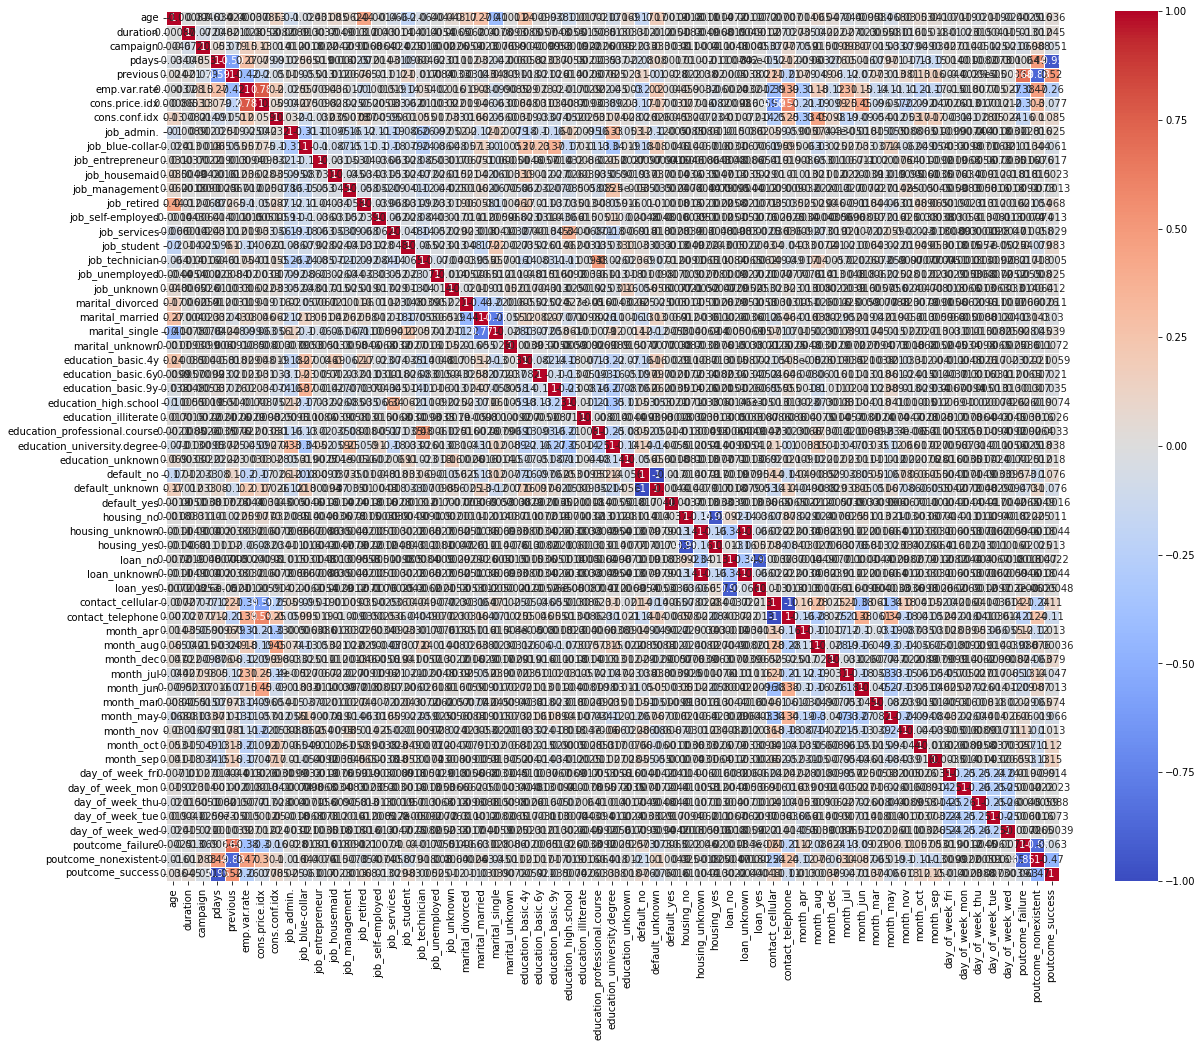

In [108]:
# correlation matrix after removing highly correlated values 
corr = df.corr()

# Plot heatmap with larger size and clearer annotations
plt.figure(figsize=(20, 16))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=.5, annot_kws={"size": 10})
plt.show()

In [44]:
df.isnull().sum()

age                     0
duration                0
campaign                0
pdays                   0
previous                0
                       ..
day_of_week_tue         0
day_of_week_wed         0
poutcome_failure        0
poutcome_nonexistent    0
poutcome_success        0
Length: 62, dtype: int64

# 3) Build and visualize a DecisionTree of Max Depth 3. Show and save the confusion matrix.

In [45]:
X = df.drop(['y'], axis=1)
y = df['y']

In [48]:
# Split data into training and test sets
train_size = int(0.8 * len(df))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
# To address the imbalanced data set, we can resample the dataset using SMOTE

In [69]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [70]:
# Train decision tree model
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

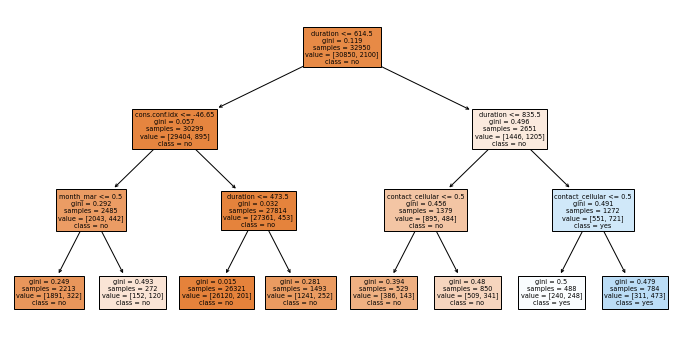

In [71]:
# Visualize decision tree
plt.figure(figsize=(12,6))
plot_tree(model, feature_names=X.columns, class_names=['no', 'yes'], filled=True)
plt.show()


In [92]:
# Make predictions on test set
y_pred_D = model.predict(X_test)

# Print confusion matrix
conf_matrix1 = confusion_matrix(y_test, y_pred_D)
print(conf_matrix1)

[[5607   91]
 [2337  203]]


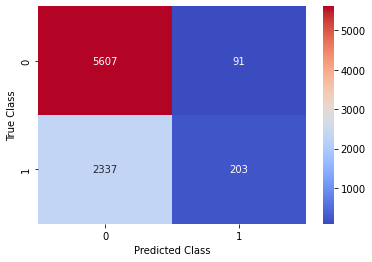

In [109]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap="coolwarm")
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.savefig('confusion_matrix1.png')

# 3.) Use Bagging with 100 estimators. Save your CM.

In [91]:
# Define bagging classifier with decision tree as base estimator
bag_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3), n_estimators=100, random_state=42)

# Train the bagging classifier
bag_clf.fit(X_train, y_train)

# Make predictions on test set
y_pred_Bag = bag_clf.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [94]:
# Print confusion matrix
conf_matrix2 = confusion_matrix(y_test, y_pred_Bag)
print(conf_matrix2)

[[5608   90]
 [2342  198]]


In [95]:
# Display confusion matrix
print(conf_matrix2)

[[5608   90]
 [2342  198]]


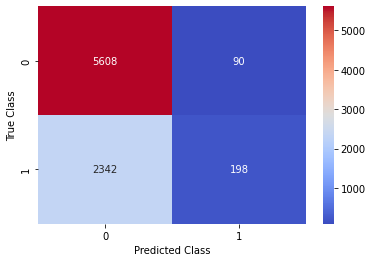

In [110]:
# Save confusion matrix as image
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap="coolwarm")
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.savefig('bagging_confusion_matrix2.png')

# 4.) Boost your tree and save the CM

In [79]:
# Create a Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(max_depth=3, n_estimators=100, random_state=42)

# Train the model
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [98]:
# Make predictions on the test data
y_pred_Grad = gb_clf.predict(X_test)

In [99]:
# Print the confusion matrix
conf_matrix3 = confusion_matrix(y_test, y_pred_Grad)
print(conf_matrix3)

[[5259  439]
 [1928  612]]


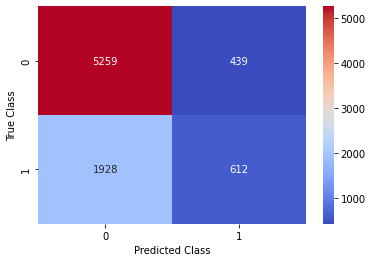

In [111]:
# Save confusion matrix as image
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix3, annot=True,fmt='d', cmap="coolwarm")
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.savefig('confusion_matrix3.png')

# 5.) Create a superlearner with at least 5 base learner models. Use a logistic reg for your metalearner. Interpret your coefficients and save your CM.

In [101]:
# Define base learner models
models = [('lr', LogisticRegression()), ('nb', GaussianNB()), ('knn', KNeighborsClassifier()), ('rf', RandomForestClassifier())]

# Define stacking classifier with logistic regression as metalearner
Sup_learn = StackingClassifier(estimators=models, final_estimator=LogisticRegression())

# Train stacking classifier on training data
Sup_learn.fit(X_train, y_train)

# Make predictions on test data
y_pred_S = Sup_learn.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

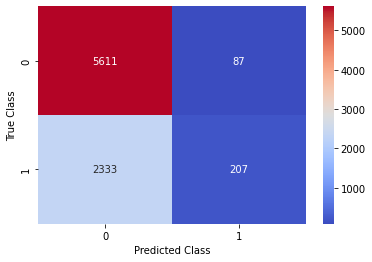

In [112]:
# Evaluate the performance of the superlearner using a confusion matrix
conf_matrix4 = confusion_matrix(y_test, y_pred_S)
sns.heatmap(conf_matrix4, annot=True, fmt='d', cmap="coolwarm")
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.savefig('confusion_matrix4.png')

# 6.) Create two bar charts comparing decision tree, bagged, boosted and super learner Sensitivities and specificities

In [103]:
# Decision Tree
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_D).ravel()
sensitivity_dt = tp / (tp + fn)
specificity_dt = tn / (tn + fp)

# Bagged Decision Trees
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_Bag).ravel()
sensitivity_bag = tp / (tp + fn)
specificity_bag = tn / (tn + fp)

# Gradient Boosted Trees
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_Grad).ravel()
sensitivity_boost = tp / (tp + fn)
specificity_boost = tn / (tn + fp)

# Super Learner
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_S).ravel()
sensitivity_super = tp / (tp + fn)
specificity_super = tn / (tn + fp)

In [104]:
sensitivities = [sensitivity_dt, sensitivity_bag, sensitivity_boost, sensitivity_super]
specificities = [specificity_dt, specificity_bag, specificity_boost, specificity_super]
models = ['Decision Tree', 'Bagged', 'Boosted', 'Super Learner']

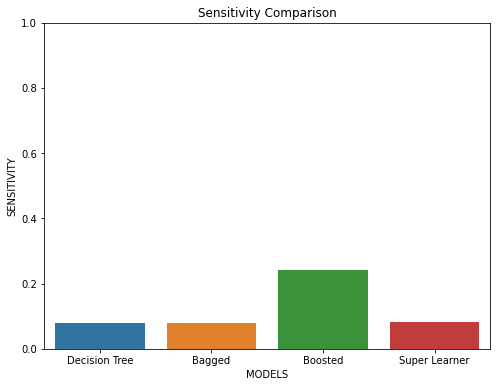

In [106]:
# Sensitivity Bar Chart
plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=sensitivities)
plt.title('Sensitivity Comparison')
plt.xlabel('MODELS')
plt.ylabel('SENSITIVITY')
plt.ylim(0, 1)
plt.show()

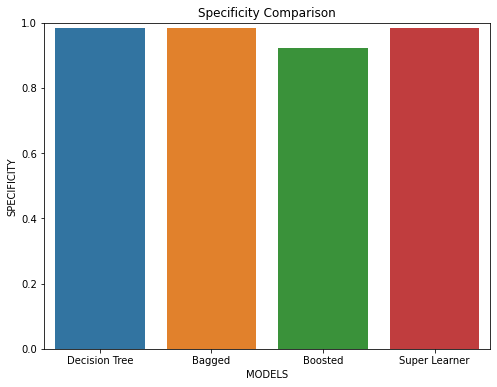

In [107]:
# Specificity Bar Chart
plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=specificities)
plt.title('Specificity Comparison')
plt.xlabel('MODELS')
plt.ylabel('SPECIFICITY')
plt.ylim(0, 1)
plt.show()